In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import os
os.environ["GDAL_DATA"] = "/Users/parndt/anaconda3/envs/eeicelakes-env/share/gdal"
os.environ["PROJ_LIB"] = "/Users/parndt/anaconda3/envs/eeicelakes-env/share/proj"
os.environ["PROJ_DATA"] = "/Users/parndt/anaconda3/envs/eeicelakes-env/share/proj"
import traceback
import pandas as pd
from IPython.display import Image, display

In [6]:
basedir = '../GLD3_complete/'

searchdir = basedir + 'AIS/detection_out_stat/'
searchfor = '.csv'
filelist_ais = [searchdir+f for f in os.listdir(searchdir) \
            if os.path.isfile(os.path.join(searchdir, f)) & (searchfor in f)]
filelist_ais.sort()
listlength = len(filelist_ais)
print('AIS number .cvs:', listlength)

searchdir = basedir + 'GrIS/detection_out_stat/'
searchfor = '.csv'
filelist_gris = [searchdir+f for f in os.listdir(searchdir) \
            if os.path.isfile(os.path.join(searchdir, f)) & (searchfor in f)]
filelist_gris.sort()
listlength = len(filelist_gris)
print('GrIS number .csv:', listlength)

filelist = filelist_ais + filelist_gris
filelist.sort()
listlength = len(filelist)
print('total number .csv:', listlength)

AIS number .cvs: 42583
GrIS number .csv: 11294
total number .csv: 53877


note that there are a few less granules because empty granules, or granules with barely any data are not read in for FLUID

In [13]:
dfs = []
col_names = ['polygon', 
             'granule', 
             'length_granule_xatc_meters', 
             'length_FLUID_detected_lakes_xatc_meters',
             'number_photons_granule',
             'number_photons_FLUID_detected_lakes']
for i, fn in enumerate(filelist):
    print('%6i / %6i' % (i+1, len(filelist)), end='\r')
    df = pd.read_csv(fn, names=col_names)
    dfs.append(df)

print('\n --> Done!')
df = pd.concat(dfs).reset_index(drop=True)

outfn = 'GLD3_stats_combined.csv'
outpath = basedir + outfn
df.to_csv(outpath, index=False)
print('wrote file %s' % outpath)

outpath = 'granule_lists/' + outfn
df.to_csv(outpath, index=False)
print('wrote file %s' % outpath)

df = pd.read_csv(outpath) 

display(df)

 53877 /  53877
 --> Done!
wrote file ../GLD3_complete/GLD3_stats_combined.csv
wrote file granule_lists/GLD3_stats_combined.csv


,polygon,granule,length_granule_xatc_meters,length_FLUID_detected_lakes_xatc_meters,number_photons_granule,number_photons_FLUID_detected_lakes
0,ANT_1000_East_A-Ap.geojson,ATL03_20181101140124_05180112_006_02.h5,1092690.096,0.0,31668347,0
1,ANT_1000_East_A-Ap.geojson,ATL03_20181102133546_05330112_006_02.h5,1209865.062,0.0,25279148,0
2,ANT_1000_East_A-Ap.geojson,ATL03_20181102151004_05340112_006_02.h5,1426179.620,0.0,34969195,0
3,ANT_1000_East_A-Ap.geojson,ATL03_20181103002225_05400110_006_02.h5,0.000,0.0,0,0
4,ANT_1000_East_A-Ap.geojson,ATL03_20181103015642_05410110_006_02.h5,942440.707,0.0,7512780,0
...,...,...,...,...,...,...
53865,GRE_2200_SW.geojson,ATL03_20230926161918_01172105_006_02.h5,NaN,0.0,9699245,0
53866,GRE_2200_SW.geojson,ATL03_20230928041727_01402103_006_02.h5,NaN,0.0,0,0
53867,GRE_2200_SW.geojson,ATL03_20230929035148_01552103_006_02.h5,4819362.451,882.0,12080598,2086
53868,GRE_2200_SW.geojson,ATL03_20230929163640_01632105_006_02.h5,3181145.292,1151.0,48247402,45698


In [29]:
df['sheet'] = df.apply(lambda x: ('GrIS' if x.polygon[:3] == 'GRE' else 'AIS'), axis=1)
df_gris = df[df.sheet == 'GrIS']
df_ais = df[df.sheet == 'AIS']

print('\nTOTAL:')
df_stats = df[['length_granule_xatc_meters', 'number_photons_granule']].sum()
print('%.2f billion photons' % (df_stats.number_photons_granule/1e9))
print('%.2f million kilometers along-track (million miles: %.2f)' % (df_stats.length_granule_xatc_meters/1e9, df_stats.length_granule_xatc_meters/1e9*0.621371))

print('\nGrIS:')
df_stats = df_gris[['length_granule_xatc_meters', 'number_photons_granule']].sum()
print('%.2f billion photons' % (df_stats.number_photons_granule/1e9))
print('%.2f million kilometers along-track (million miles: %.2f)' % (df_stats.length_granule_xatc_meters/1e9, df_stats.length_granule_xatc_meters/1e9*0.621371))

print('\nAIS:')
df_stats = df_ais[['length_granule_xatc_meters', 'number_photons_granule']].sum()
print('%.2f billion photons' % (df_stats.number_photons_granule/1e9))
print('%.2f million kilometers along-track (million miles: %.2f)' % (df_stats.length_granule_xatc_meters/1e9, df_stats.length_granule_xatc_meters/1e9*0.621371)) 


TOTAL:
765.00 billion photons
66.92 million kilometers along-track (million miles: 41.58)

GrIS:
170.97 billion photons
12.24 million kilometers along-track (million miles: 7.61)

AIS:
594.03 billion photons
54.68 million kilometers along-track (million miles: 33.97)


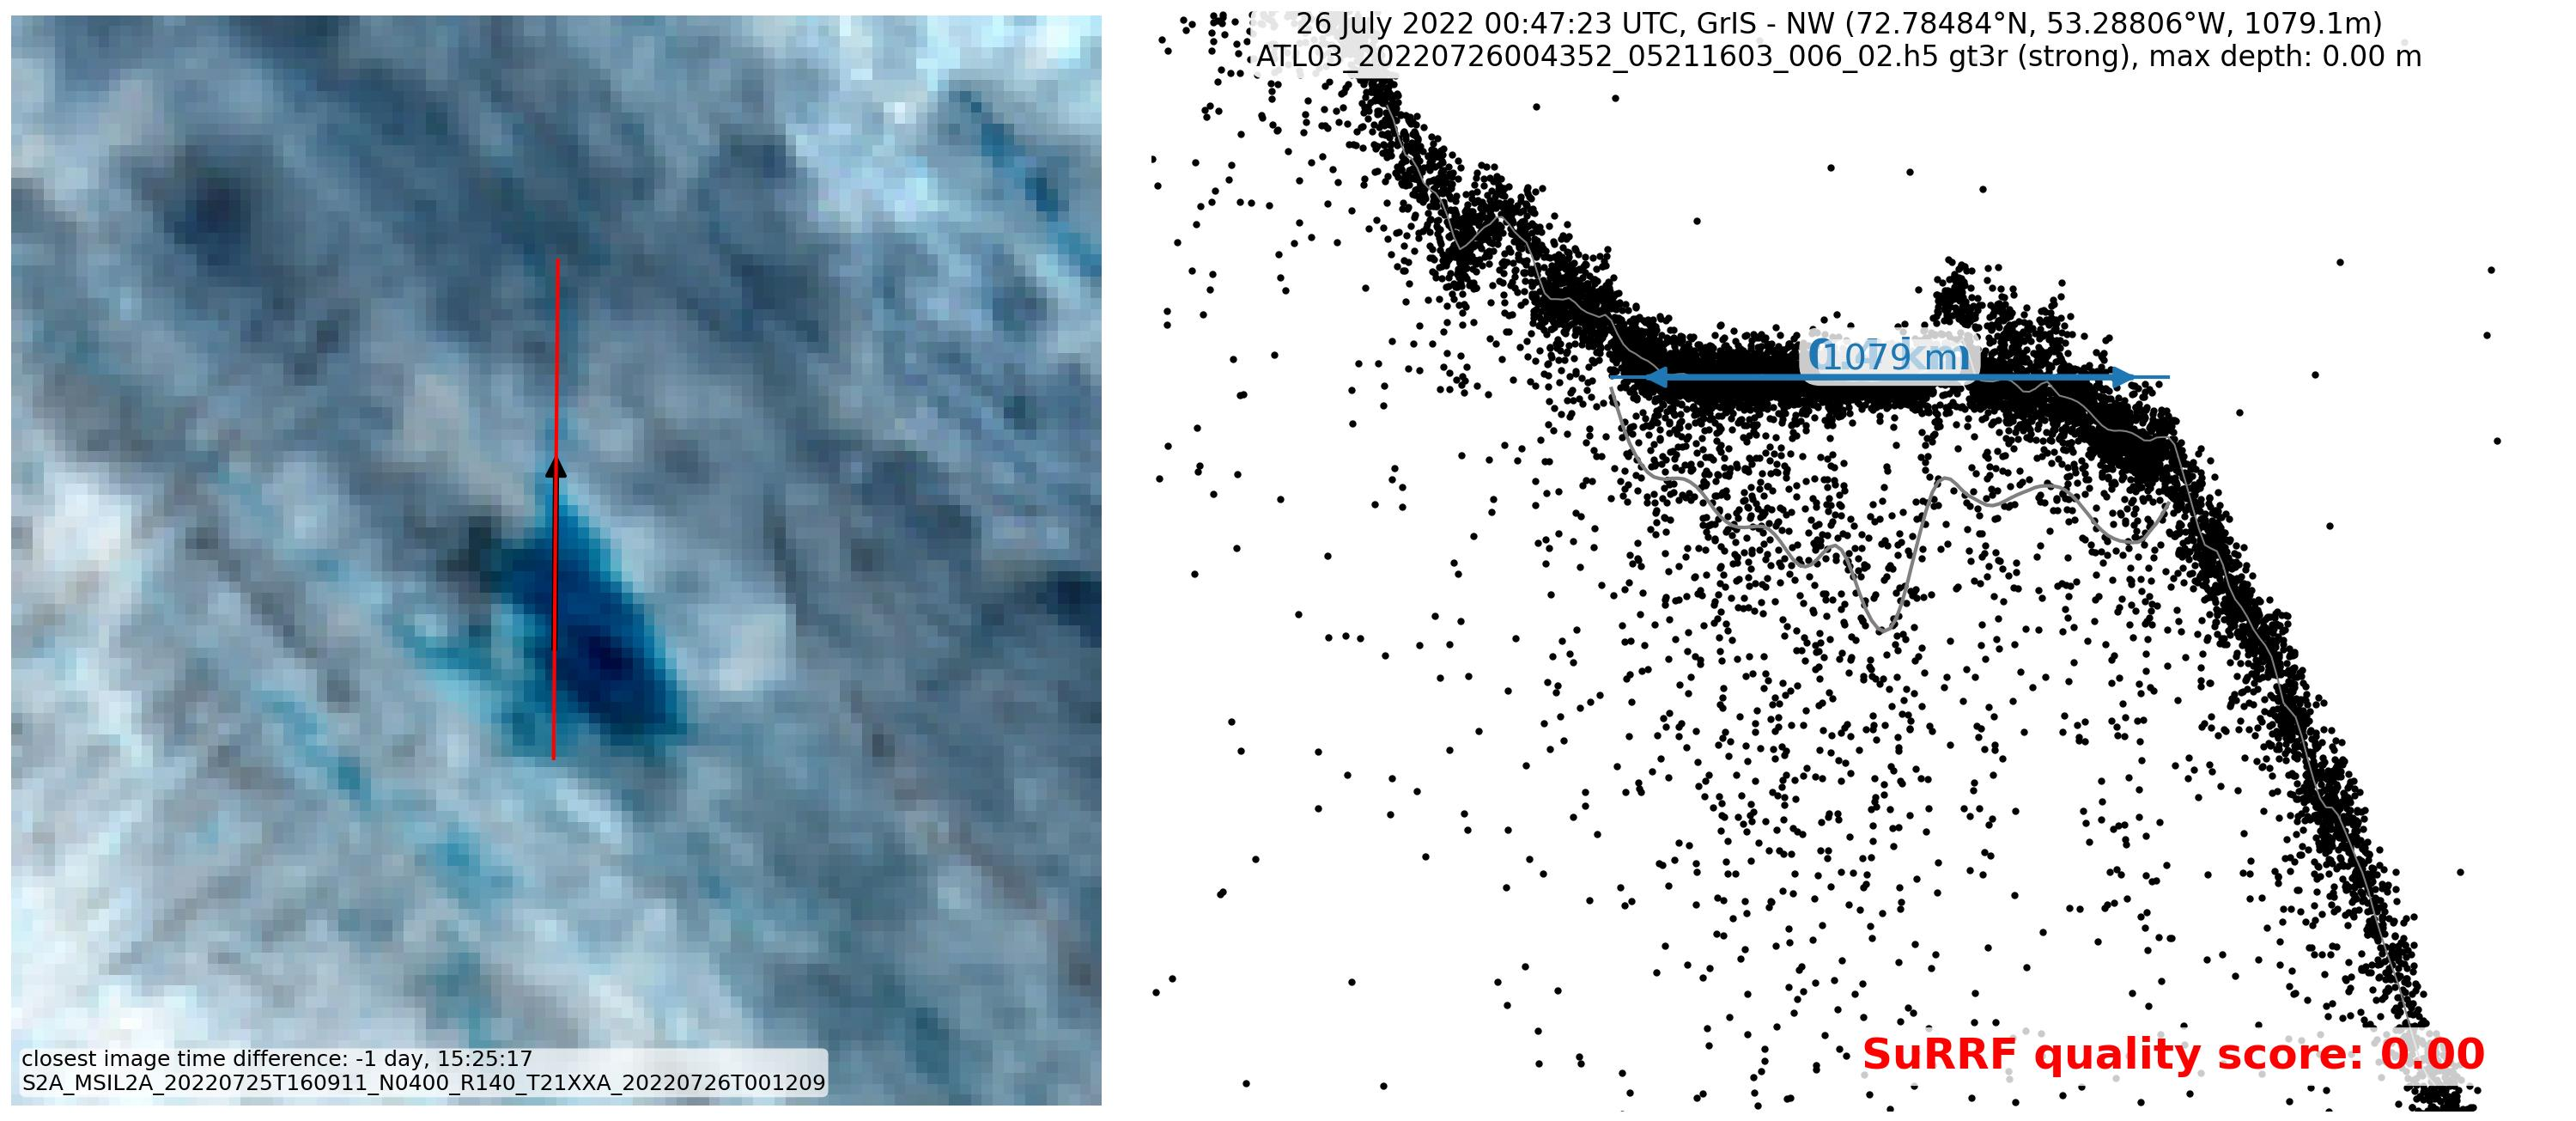

In [37]:
#display(Image('../GLD3_complete/GrIS/detection_context/bad_no_lake/lake_099969_GrIS_2023_simplified_GRE_2200_NW_ATL03_20230826054957_10242003_006_02_gt2r_0020_context.jpg'))

#mlake_100000_GrIS_2022_simplified_GRE_2200_NW_ATL03_20220728012647_05521603_006_02_gt2l_0001_context.jpg
display(Image('../GLD3_complete/GrIS/detection_context/lake_bad_depth/lake_100000_GrIS_2022_simplified_GRE_2200_NW_ATL03_20220726004352_05211603_006_02_gt3r_0014_context.jpg'))


In [36]:
# ! mv ../GLD3_complete/GrIS/detection_context/lake_bad_depth/lake_100000_GrIS_2022_simplified_GRE_2200_NW_ATL03_20220728012647_05521603_006_02_gt2l_0001_context.jpg ../GLD3_complete/GrIS/detection_context/bad_no_lake/lake_100000_GrIS_2022_simplified_GRE_2200_NW_ATL03_20220728012647_05521603_006_02_gt2l_0001_context.jpg
# ! mv ../GLD3_complete/GrIS/detection_context/bad_no_lake/lake_099969_GrIS_2023_simplified_GRE_2200_NW_ATL03_20230826054957_10242003_006_02_gt2r_0020_context.jpg ../GLD3_complete/GrIS/detection_context/good_lake/

In [25]:
df_stats['sheet'] = df.apply(lambda x: ('GrIS' if x.polygon[:3] == 'GRE' else 'AIS'), axis=1)
# df_stats['sheet'] = df_stats.apply(lambda x: 'GrIS' if x['polygon'][:3] == 'GRE' else 'AIS', axis=1)


In [28]:
df_gris = df[df.sheet == 'GrIS']
df_gris

,polygon,granule,length_granule_xatc_meters,length_FLUID_detected_lakes_xatc_meters,number_photons_granule,number_photons_FLUID_detected_lakes,sheet
42577,GRE_2200_CE.geojson,ATL03_20190501075713_05050303_006_02.h5,1256468.557,0.0,41407900,0,GrIS
42578,GRE_2200_CE.geojson,ATL03_20190501204205_05130305_006_02.h5,117416.707,0.0,2777392,0,GrIS
42579,GRE_2200_CE.geojson,ATL03_20190502073133_05200303_006_02.h5,2595618.793,0.0,60203381,0,GrIS
42580,GRE_2200_CE.geojson,ATL03_20190502201626_05280305_006_02.h5,2188124.831,0.0,50766996,0,GrIS
42581,GRE_2200_CE.geojson,ATL03_20190503070553_05350303_006_02.h5,78361.114,191.0,2218535,7087,GrIS
...,...,...,...,...,...,...,...
53865,GRE_2200_SW.geojson,ATL03_20230926161918_01172105_006_02.h5,NaN,0.0,9699245,0,GrIS
53866,GRE_2200_SW.geojson,ATL03_20230928041727_01402103_006_02.h5,NaN,0.0,0,0,GrIS
53867,GRE_2200_SW.geojson,ATL03_20230929035148_01552103_006_02.h5,4819362.451,882.0,12080598,2086,GrIS
53868,GRE_2200_SW.geojson,ATL03_20230929163640_01632105_006_02.h5,3181145.292,1151.0,48247402,45698,GrIS
